In [1]:
# -*- coding: utf-8 -*-
import jieba

In [2]:
stopwords = {}.fromkeys([line.rstrip() for line in open(r'C:/Users/Hasee/Desktop/体育文本数据挖掘/stop_vocalbu.txt', encoding='utf-8')])

In [3]:
with open('C:/Users/Hasee/Desktop/体育文本数据挖掘/all_text.txt') as f:
    m = f.read()
n = m.split('\n')
#使用jieba进行分词,并删除停用词

token_tfidf = []
token_sentence=[]
for i in n:
    a = jieba.cut(i,cut_all=False)
    for p in a:
        if p not in stopwords:
            token_tfidf.append(p)
            
# token_tfidf =str(token_tfidf)




Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Hasee\AppData\Local\Temp\jieba.cache
Loading model cost 1.207 seconds.
Prefix dict has been built successfully.


In [4]:
#token就是已经分完词的了
import jieba
import jieba.posseg as pseg
ner_word = []
ner_flag = []
for i in token_tfidf:
    words = pseg.cut(str(i)) 
    for word, flag in words:
        ner_word.append(word)
        ner_flag.append(flag)




In [5]:
print(len(ner_word))
print(len(ner_flag))
print(ner_word[0:100])
print(ner_flag[0:100])

119857
119857
['一节', '踢', '同学', 'jio', '偷看', '班主任', '环节', '火', '记得', '赞', '深圳市', '红岭', '初一', '11', '班张', '哲', '轩', '前来', '学习', '哈哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '学', '了', '800', '年', '没', '学会', '平陵', '高中', '朱振宇', '学', '做', '体侧', '运动', '腰', '快断', '弯', '大', '个', '弯', '做', '体测', '腰', '快断', '搓澡', '想念', '七彩', '阳光', '十七中', '报', '到', '好', '难', '我', '练', '下午', '海口', '九中', '沈阳市', '第七', '路过', '沈阳市', '第七', '报道', '通辽', '二中', '肇源', '五中', '排面']
['m', 'v', 'n', 'eng', 'v', 'n', 'n', 'n', 'v', 'v', 'ns', 'nr', 't', 'm', 'nr', 'nr', 'nr', 't', 'v', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'v', 'ul', 'm', 'm', 'v', 'n', 'ns', 's', 'nr', 'n', 'v', 'n', 'vn', 'n', 'd', 'v', 'a', 'q', 'v', 

In [6]:
index = []
for idx,flag in enumerate(ner_flag):
    if flag =='n' or flag=='v' or flag=='vn' or flag =='A':
        index.append(idx)

In [7]:
print(len(index))

57109


In [8]:
#这里比较慢,大概10分钟左右
from tqdm import tqdm
words=[] #这个是符合词性的n,v,vn,A
with open('available_word.txt','w',encoding = 'utf-8')as f:
    for idx in tqdm(index):
            words.append(ner_word[idx])
            f.write(ner_word[idx])
            f.write("\n")

    

100%|██████████| 57109/57109 [00:00<00:00, 538752.30it/s]


In [9]:
assert len(words) == len(index),print('不等长')

In [10]:
print(words[0:100])

['踢', '同学', '偷看', '班主任', '环节', '火', '记得', '赞', '学习', '学', '没', '学会', '学', '做', '体侧', '运动', '腰', '弯', '弯', '做', '体测', '腰', '搓澡', '想念', '报', '到', '练', '路过', '报道', '肇源', '排面', '报道', '花', '广金', '学校', '实名', '社死', '花', '广金', '学校', '实名', '社死', '花', '广金', '学校', '实名', '社死', '花', '广金', '学校', '实名', '社死', '要来', '力', '回不去', '跳跃', '运动', '脚', '跳', '靠靠', '错', '节拍', '报告', '爷青', '回', '挑', '领操', '要学', '要领', '操', '报道', '跳跃', '运动', '来', '报道', '要学', '学', '踢腿', '运动', '路过', '哥们', '包浆', '动作', '好像', '眉', '姐姐', '飞', '笑', '死', '全身', '酸痛', '学习', '交通', '大学', '附属中学', '实验', '可恶', '控制', '身体', '惊']


In [11]:
print(words[0:100])

['踢', '同学', '偷看', '班主任', '环节', '火', '记得', '赞', '学习', '学', '没', '学会', '学', '做', '体侧', '运动', '腰', '弯', '弯', '做', '体测', '腰', '搓澡', '想念', '报', '到', '练', '路过', '报道', '肇源', '排面', '报道', '花', '广金', '学校', '实名', '社死', '花', '广金', '学校', '实名', '社死', '花', '广金', '学校', '实名', '社死', '花', '广金', '学校', '实名', '社死', '要来', '力', '回不去', '跳跃', '运动', '脚', '跳', '靠靠', '错', '节拍', '报告', '爷青', '回', '挑', '领操', '要学', '要领', '操', '报道', '跳跃', '运动', '来', '报道', '要学', '学', '踢腿', '运动', '路过', '哥们', '包浆', '动作', '好像', '眉', '姐姐', '飞', '笑', '死', '全身', '酸痛', '学习', '交通', '大学', '附属中学', '实验', '可恶', '控制', '身体', '惊']


In [12]:
from jieba import analyse
words_list = words
words_str = str(words)
keywords = analyse.extract_tags(words_str,topK=30,withWeight=True) #建议这里先进行一轮筛选,拿出名词,动词,动名词,形容词进行设置,这个地方是关键词提取

#进行关键词提取,只对形容词,名词,动词,动名词设置筛选
#使用词图模型TextRank方法

热词
风帆
放飞
希望
广播操
回复
雏鹰
舞动
召唤
起飞
广播体操
初升
时代
小学
中学 

In [13]:
print(keywords)

[('运动', 0.15907396963584536), ('做操', 0.1422330246802884), ('动作', 0.12055634091467006), ('报道', 0.11720913376612384), ('跑操', 0.11200715665309585), ('学校', 0.10380152405017812), ('大哭', 0.10178290822076279), ('记得', 0.08336636118075205), ('跳跃', 0.0812256414779621), ('学会', 0.07271811905103308), ('音乐', 0.06579060952516794), ('感觉', 0.06475657861068307), ('踢腿', 0.06392170610918292), ('回忆', 0.060342036169327117), ('怀念', 0.05951768275006079), ('打卡', 0.05838078247769296), ('视频', 0.055809941830938646), ('领操', 0.055430643779349725), ('老师', 0.05423805319515408), ('喜欢', 0.05288235782274696), ('同学', 0.05215622255932146), ('弹幕', 0.05165677015751767), ('理想', 0.04796879896914164), ('体育老师', 0.04564194075561493), ('领操员', 0.04326294148632174), ('小时候', 0.04089483876009443), ('眼睛', 0.0383173946308804), ('爷青', 0.037517082070169634), ('记忆', 0.037338279013733676), ('大学', 0.034895958610992366)]


In [14]:
#下面将词转换为词向量的过程中,他是先统计所有token的出现次数,并根据这个出现次数给所有词赋予id
#得,明白了,word2vec包括词袋法和skip-gram,这俩其实就是深度学习模型,这俩在训练之后,可以定量的去度量词与词之间的关系
#挖掘词之间的联系
#word2vec工具主要包含两个模型：跳字模型（skip-gram）和连续词袋模型（continuous bag of words，简称CBOW）
#以及两种高效训练的方法：负采样（negative sampling）和层序softmax （hierarchical softmax）。
#值得一提的是，word2vec词向量可以较好地表达不同词之间的相似和类比关系。



In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


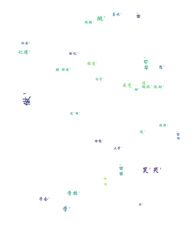

In [16]:
# mask = plt.imread('地图.jpeg')

# wc = WordCloud(font_path="simhei.ttf").generate(words_str)
# mask = plt.imread('mask.jpeg')

wordcloud = WordCloud(background_color="white", width=2500, height=3000, max_words=30,\
                      max_font_size=150,  contour_width=4,stopwords=stopwords,\
                      contour_color='white', font_path="STXINGKA.TTF").generate(words_str)



plt.imshow(wordcloud, interpolation='bilinear')   # interpolation设置插值，设置颜色、排列等
plt.axis("off")   # 关闭坐标轴
plt.show()

# 将词云图片保存到文件
wordcloud.to_file("1.wordcloud1.png")
#上面还得用python把地图的形状给弄一下


#表示词得方式one-hot、共现矩阵、词向量、之后的我暂时还没有学到了就

#下面还有情感分析,词云,词向量计算相似度,词法分析,信息抽取


In [17]:
#下面是使用hugging face进行情感分析


In [18]:
# from transformers import BartForConditionalGeneration, AutoTokenizer, Text2TextGenerationPipeline
# from transformers import pipeline

# import torch

# tokenizer=AutoTokenizer.from_pretrained('IDEA-CCNL/Randeng-BART-759M-Chinese-BertTokenizer', use_fast=False)
# model=BartForConditionalGeneration.from_pretrained('IDEA-CCNL/Randeng-BART-759M-Chinese-BertTokenizer')



In [19]:
# text = '你是[MASK]，你有多少[MASK]。'
# text2text_generator = Text2TextGenerationPipeline(model, tokenizer)
# print(text2text_generator(text, max_length=50, do_sample=False))

##上面是mask填充的东西

In [23]:
from transformers import AutoModelForSequenceClassification,AutoTokenizer,pipeline

model_name = "liam168/c2-roberta-base-finetuned-dianping-chinese"
class_num = 2
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=class_num)
tokenizer = AutoTokenizer.from_pretrained(model_name)



TypeError: expected string or bytes-like object

In [26]:
all_sentence = []
for per_sentence in n:
    if ':' in per_sentence:
        new_sentence = per_sentence.split(':')[-1]
        all_sentence.append(new_sentence)
    else:
        all_sentence.append(per_sentence)
assert len(all_sentence)==len(n),print('长度有问题')
import transformers


TypeError: expected string or bytes-like object

In [24]:
from transformers import pipeline
ts_texts = all_sentence #这个是对整个句子进行分类,句子和句子之间要设置成多个列表,或者遍历进行
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)
sentence_aim = classifier(ts_texts) #将这个的输出保存在一个txt文件里面,在文件里面进行分析就行了


TypeError: expected string or bytes-like object

In [ ]:

with open('output_sentence.txt', 'at') as f:
    for result in sentence_aim:
        f.write(f"{result}\n")

        

In [ ]:
#上面是句子情感分类
#下面是对指定类型token进行token级别的情感分析
ts_tokens = words_list
tokens_out = classifier(ts_tokens)


In [ ]:
with open('output_token.txt', 'at') as f:
    for result in tokens_out:
        f.write(f"{result}\n")
f.close

<function TextIOWrapper.close()>

#下面是词性分析等,下面如何进行推理啊
也就是命名实体识别



In [ ]:
# from transformers import pipeline,BertTokenizerFast, AutoModel


# ner_pipeline = pipeline(
#     "token-classification",
#     model='ckiplab/bert-base-chinese-ner',
#     tokenizer='bert-base-chinese',
# )



In [ ]:
# text = ""
# # result = ner_pipeline(text)
# print(result)

[]


In [ ]:
# tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese')
# model = AutoModel.from_pretrained('ckiplab/bert-base-chinese-ner')
# ner_pipe = pipeline('ner', model=model, tokenizer=tokenizer)
# print(ner_pipe('孙衍哲抓住了XXX,他是一个犯人'))


#分词、停用词、词性分析、关键词提取、词云分析、基于句子的情感分析、基于token的情感分析


In [ ]:
import torch

In [ ]:
# text = '北京是中国的首都'
# inputs = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
# outputs = model(**inputs)
# print(outputs.keys())
# predicted_labels = outputs.last_hidden_state.argmax(dim=2)
# predicted_labels = predicted_labels.squeeze().tolist()
# print(predicted_labels)
# # predicted_labels = outputs.logits.argmax(dim=2)
# # predicted_labels = predicted_labels.squeeze().tolist()

# # labels = []
# # for token, label_idx in zip(inputs.tokens()[1:-1], predicted_labels[1:-1]):
# #     label = model.config.id2label[label_idx]
# #     labels.append(label)
# # print(labels)

odict_keys(['last_hidden_state', 'pooler_output'])
[177, 408, 118, 118, 118, 118, 118, 118, 670, 177]
